# 1. Load the Dataset
Load the distillation column dataset from CSV using pandas. Update the path if needed.

In [1]:
# Load the dataset
import pandas as pd
import os
df = pd.read_csv('dataset.csv', sep=';')
df.head()
# Add Gaussian noise to all numeric columns immediately after loading the dataset
import numpy as np
num_cols = df.select_dtypes(include='number').columns
noise_std = 0.1 * df[num_cols].std()  # 10% of each feature's std
np.random.seed(42)
df[num_cols] += np.random.normal(0, noise_std, df[num_cols].shape)

# 2. Display Basic Dataset Information
Show the shape, data types, and missing values for each column.

In [2]:
# Dataset info
print('Shape:', df.shape)
df.info()
print('\nMissing values per column:')
print(df.isnull().sum())

Shape: (4408, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4408 entries, 0 to 4407
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Pressure               4408 non-null   float64
 1   T1                     4408 non-null   float64
 2   T2                     4408 non-null   float64
 3   T3                     4408 non-null   float64
 4   T4                     4408 non-null   float64
 5   T5                     4408 non-null   float64
 6   T6                     4408 non-null   float64
 7   T7                     4408 non-null   float64
 8   T8                     4408 non-null   float64
 9   T9                     4408 non-null   float64
 10  T10                    4408 non-null   float64
 11  T11                    4408 non-null   float64
 12  T12                    4408 non-null   float64
 13  T13                    4408 non-null   float64
 14  T14                    4408 non-null  

# 3. Summary Statistics and Visualizations
Show summary statistics, histograms, boxplots, and a correlation matrix heatmap for all variables.

       Pressure           T1           T2           T3           T4  \
count   4408.00  4408.000000  4408.000000  4408.000000  4408.000000   
mean       1.01   351.030225   351.407401   352.059747   352.834427   
std        0.00     0.336661     1.132047     2.679509     3.797901   
min        1.01   350.698626   350.489546   349.939947   349.339241   
25%        1.01   350.835783   350.869437   350.896810   350.964441   
50%        1.01   350.904717   351.025262   351.201525   351.439574   
75%        1.01   351.085128   351.383867   351.831974   352.501888   
max        1.01   352.415701   356.310089   365.690614   369.598557   

                T5           T6           T7           T8           T9  \
count  4408.000000  4408.000000  4408.000000  4408.000000  4408.000000   
mean    353.897812   355.221897   356.461574   357.555595   358.492280   
std       5.017290     6.292809     7.157034     7.661185     7.914401   
min     349.460669   348.950517   348.625298   348.667722   349.

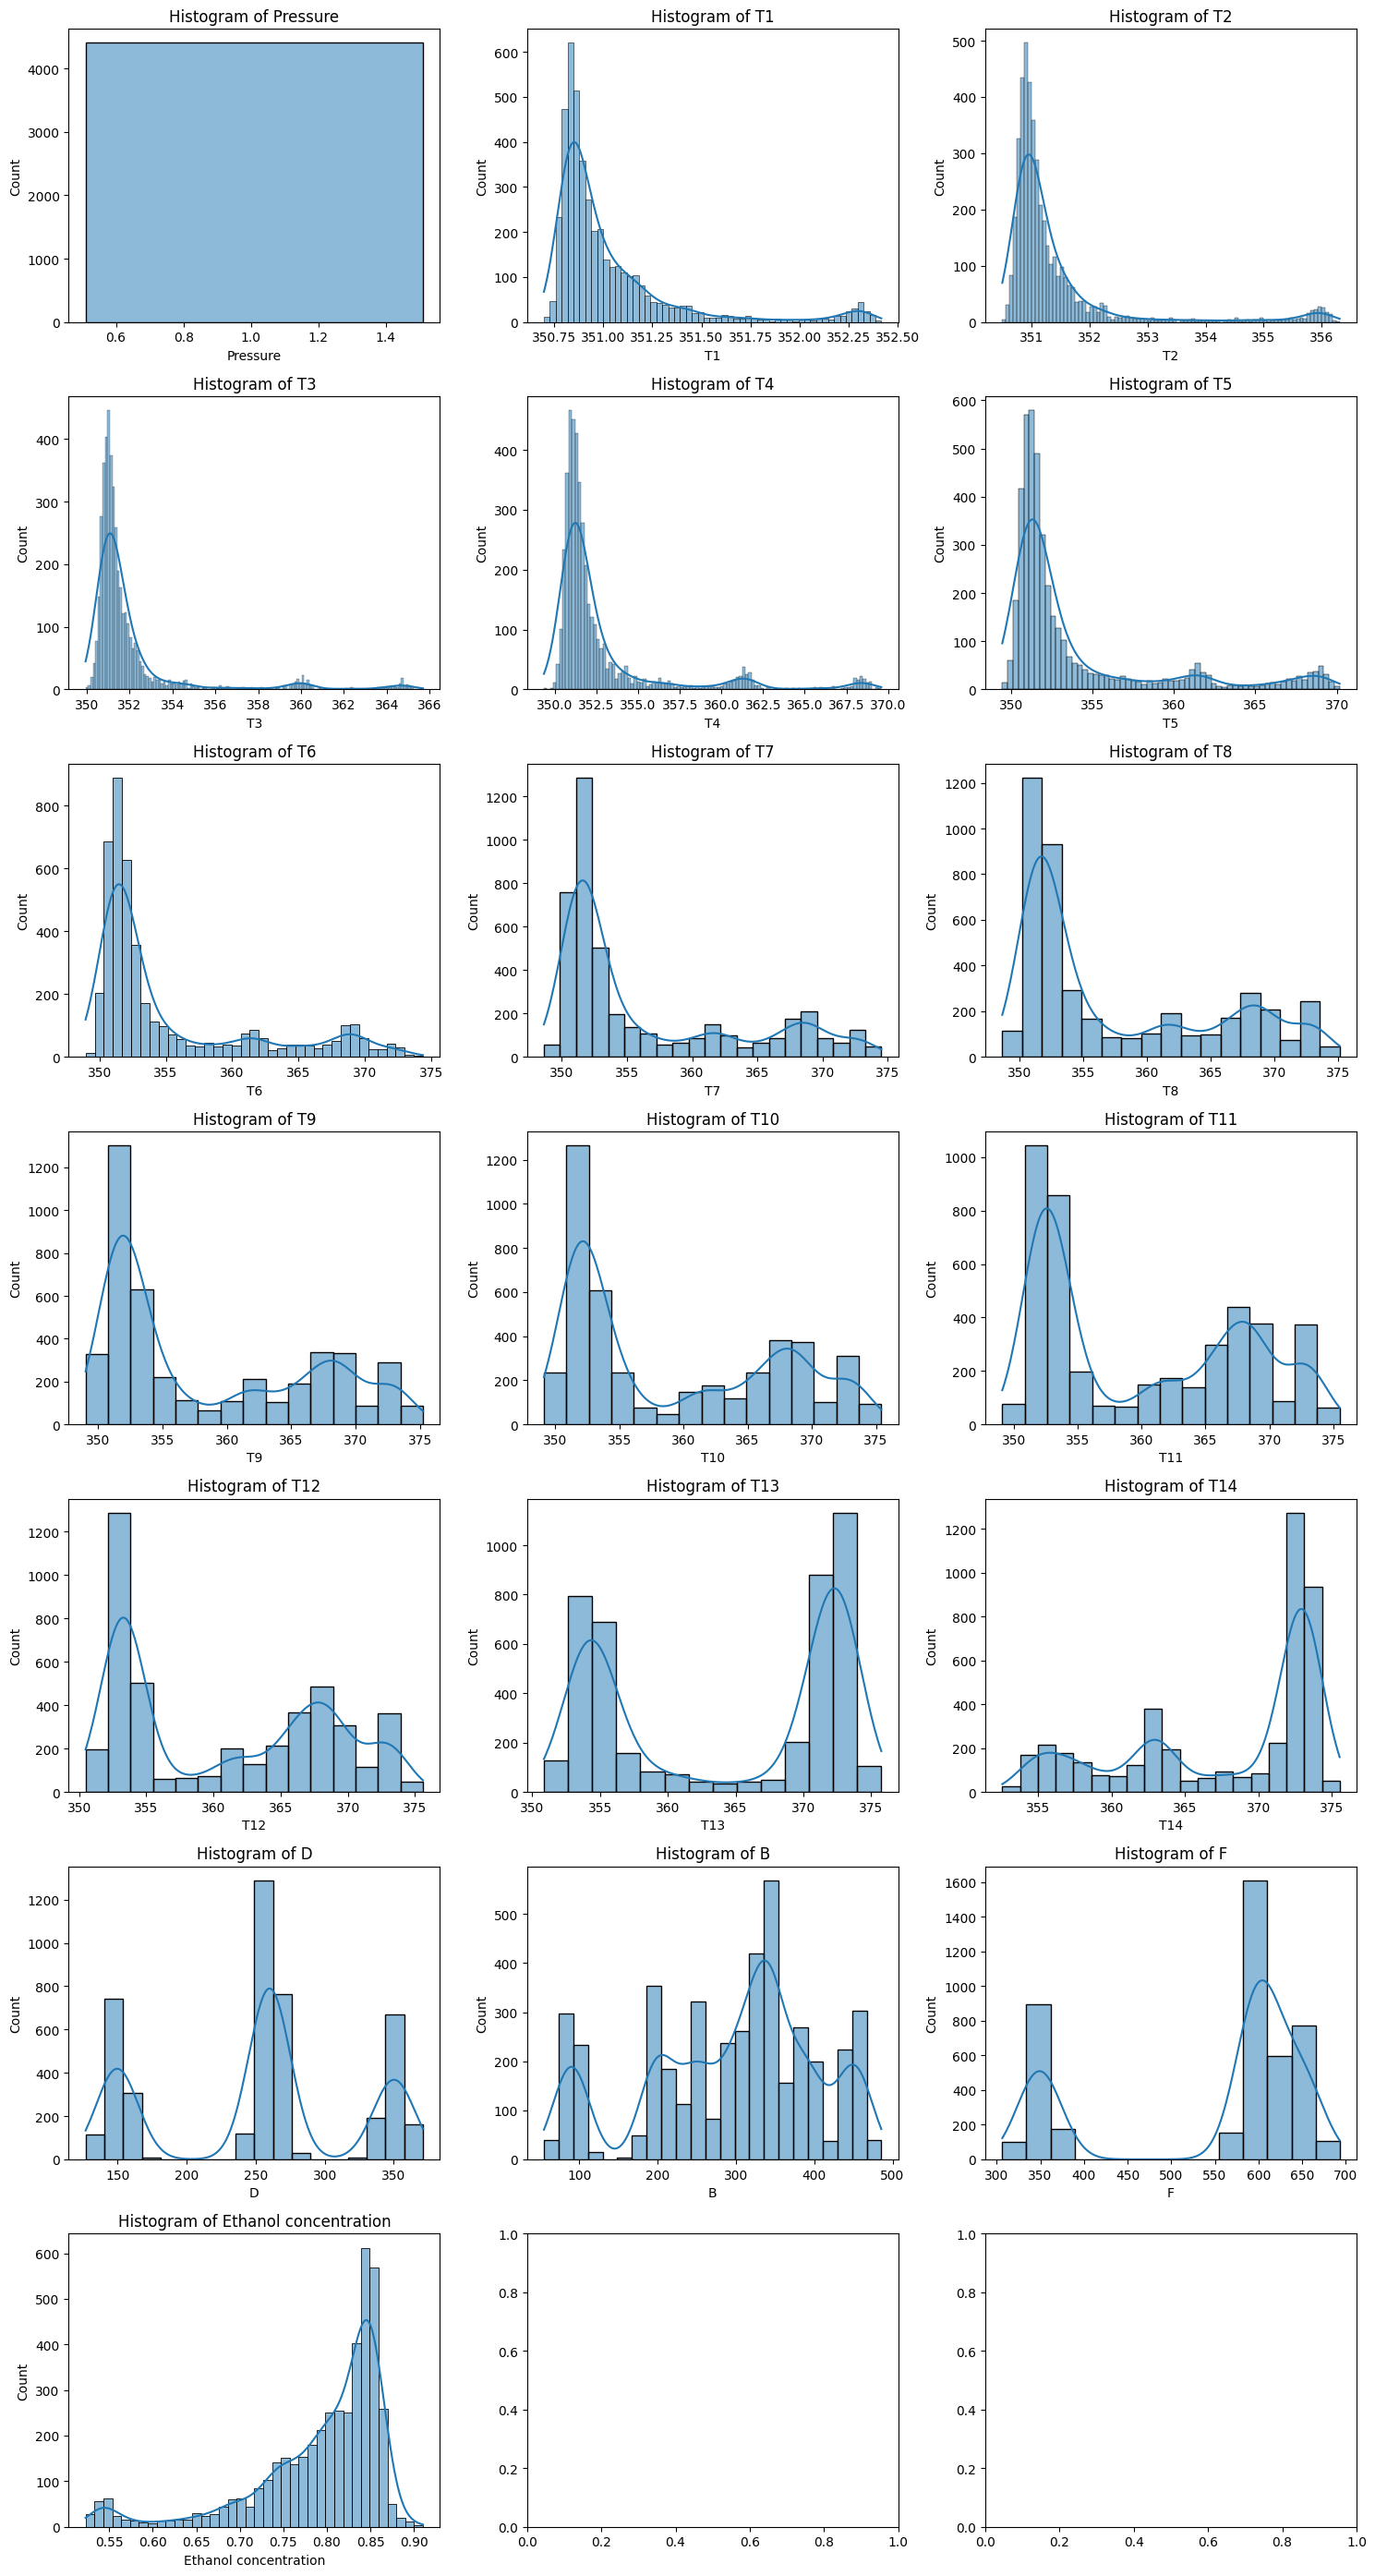

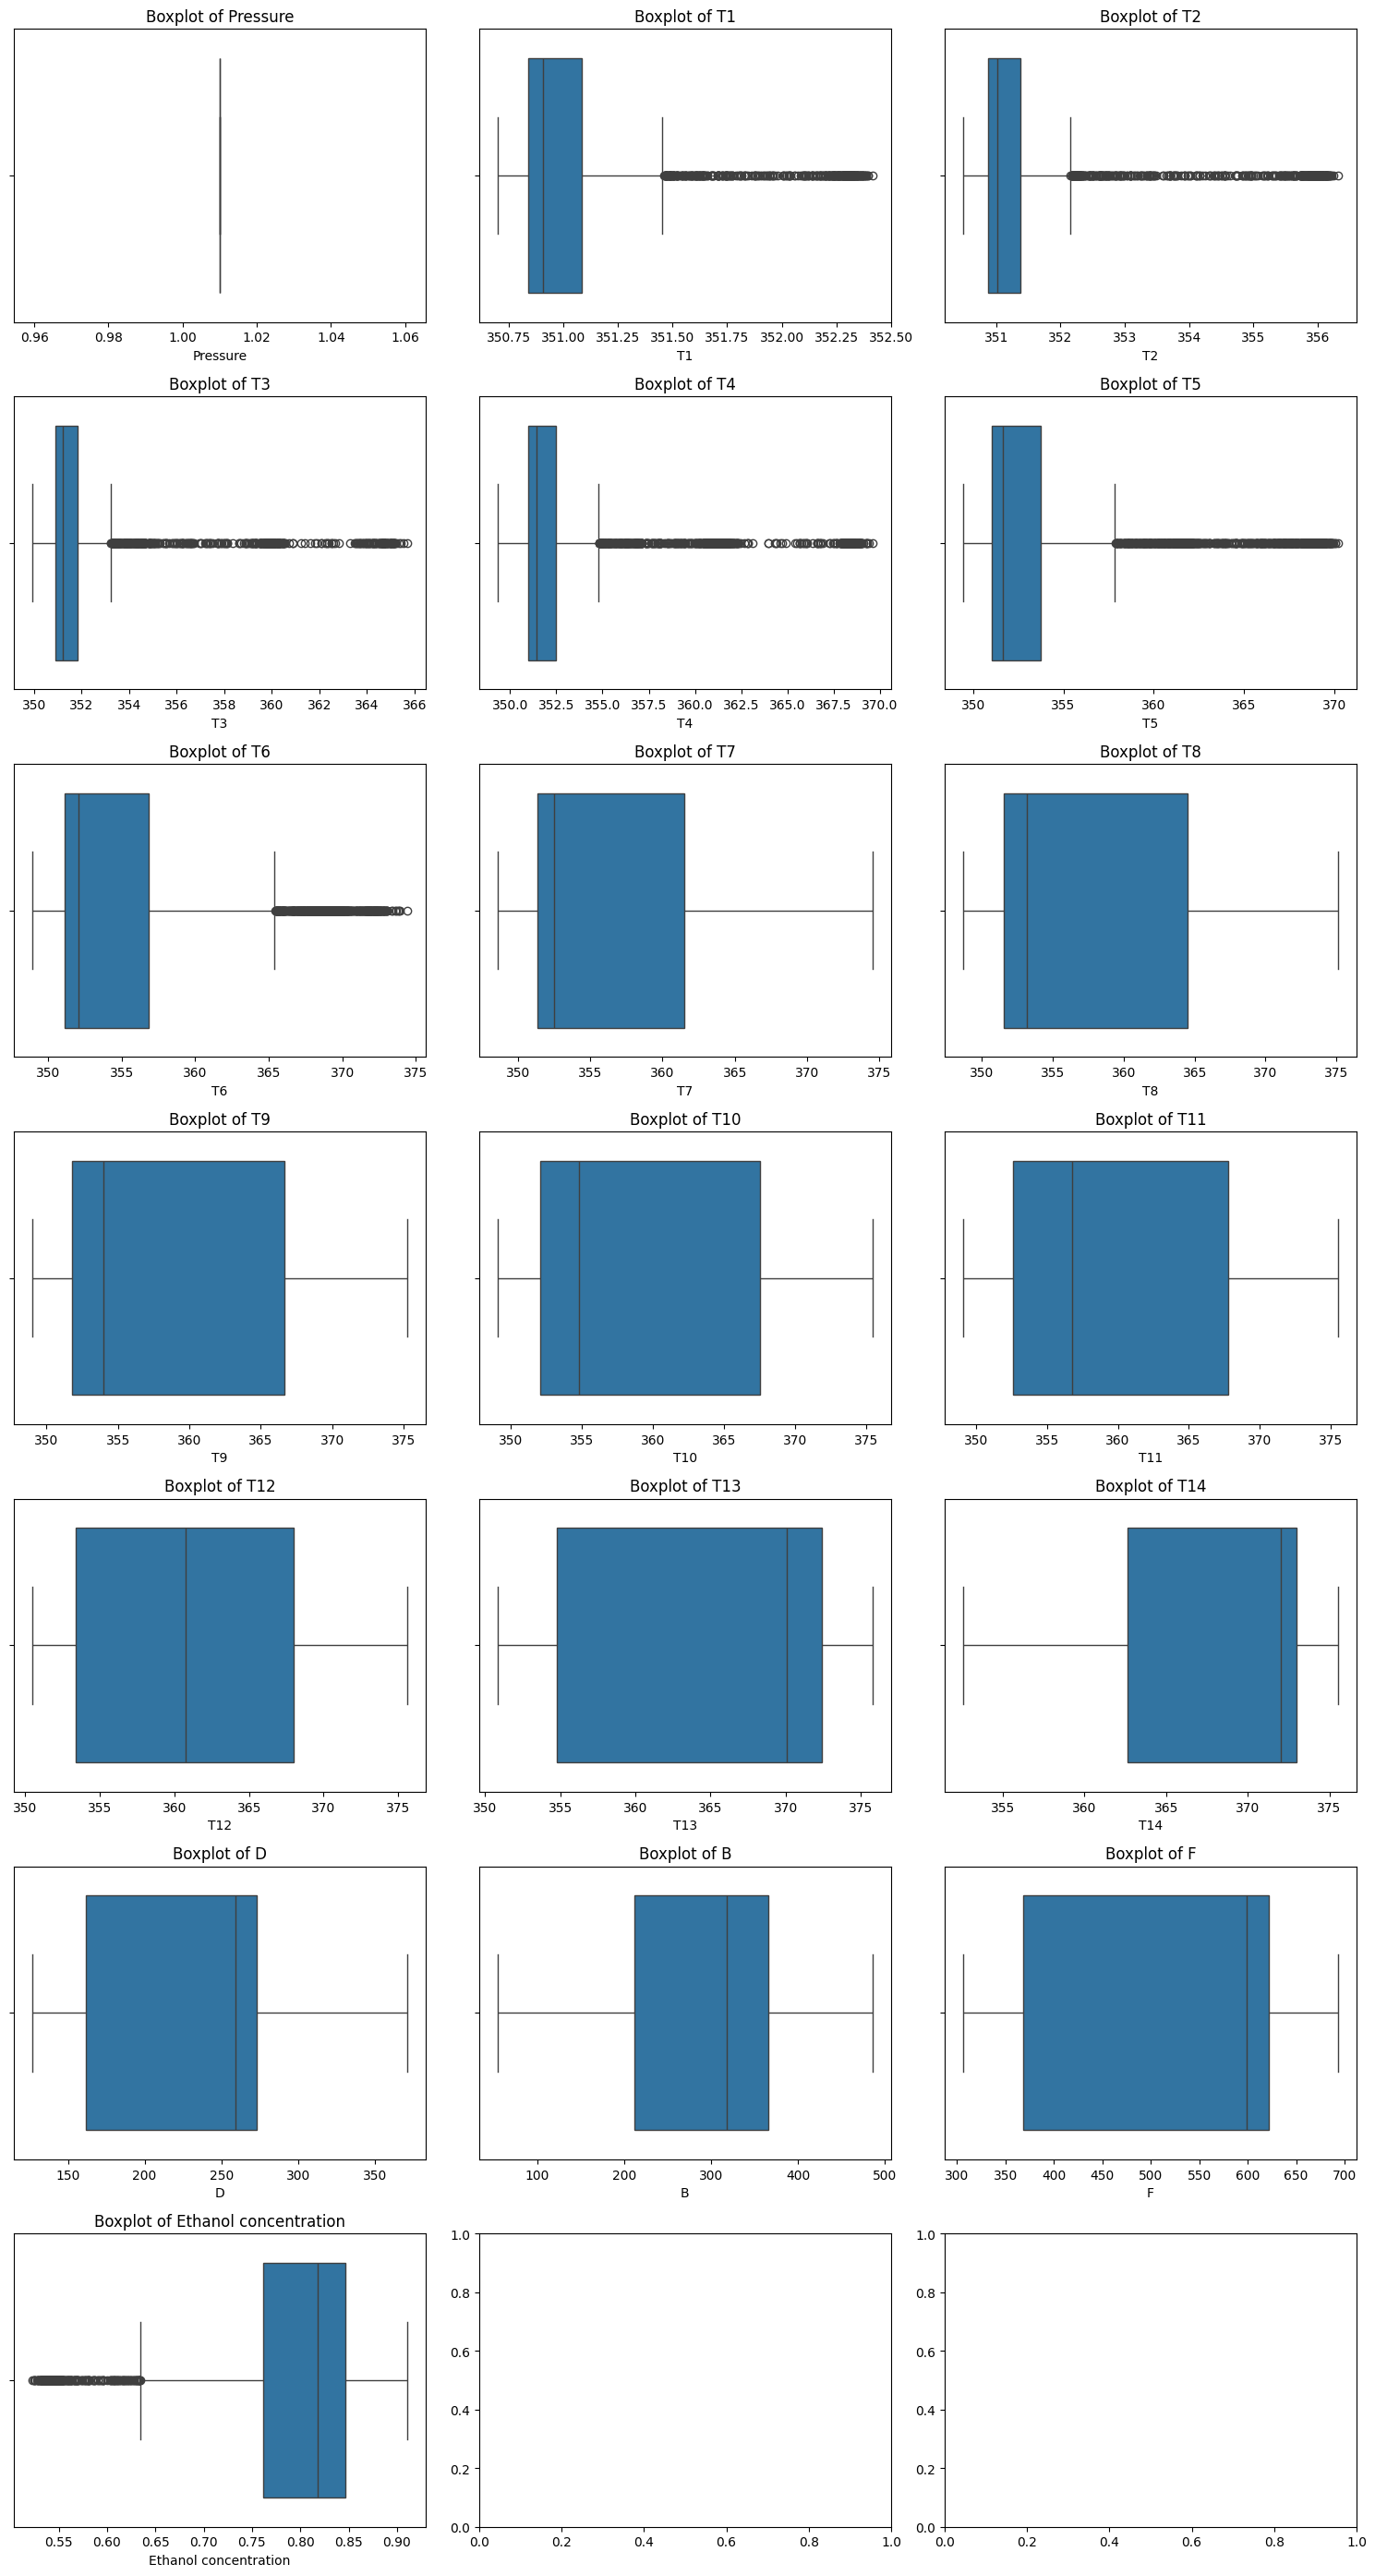

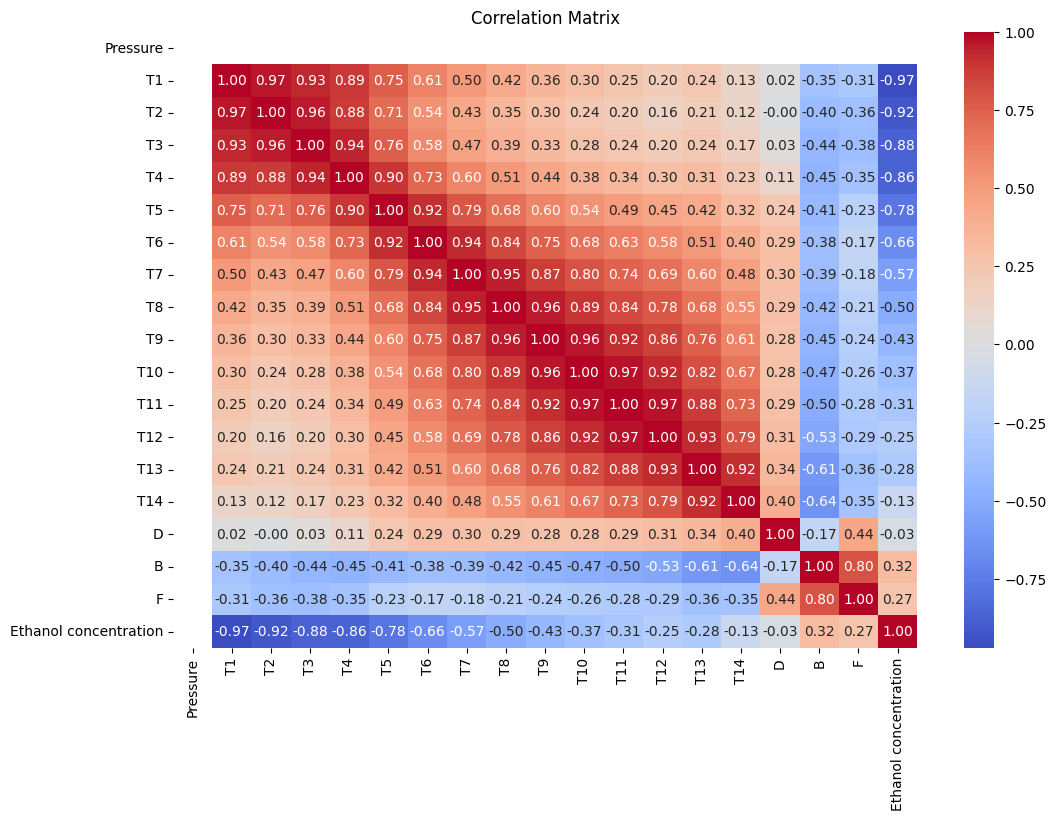

In [3]:
# Summary statistics
import matplotlib.pyplot as plt
import seaborn as sns

# Describe
print(df.describe())

# Histograms
num_cols = df.select_dtypes(include='number').columns
fig, axes = plt.subplots(len(num_cols)//3+1, 3, figsize=(15, 4*(len(num_cols)//3+1)))
axes = axes.flatten()
for i, col in enumerate(num_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

# Boxplots
fig, axes = plt.subplots(len(num_cols)//3+1, 3, figsize=(15, 4*(len(num_cols)//3+1)))
axes = axes.flatten()
for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# 5. Detect and Remove Outliers
Identify outliers using the IQR method and remove extreme rows from the dataset.

In [4]:
# Remove outliers using IQR
num_cols = df.select_dtypes(include='number').columns
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1
mask = ~((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
df = df[mask].reset_index(drop=True)
print('Shape after outlier removal:', df.shape)

Shape after outlier removal: (3539, 21)


# 6. Add Feature Engineering Columns
Create new features: TempDiff (T14 - T1) and mean_Temp (mean of T1 to T14).

In [5]:
# Feature engineering
tray_cols = [f'T{i}' for i in range(1, 15) if f'T{i}' in df.columns]
df['TempDiff'] = df['T14'] - df['T1']
df['mean_Temp'] = df[tray_cols].mean(axis=1)
df[['TempDiff', 'mean_Temp']].head()

,TempDiff,mean_Temp
0,19.439374,353.942560
1,19.368773,353.663551
2,18.793986,353.300410
3,19.160100,353.382487
4,17.054444,353.034198


# 7. Drop Unnecessary Columns
Remove the Pressure column from the dataset.

In [6]:
# Drop Pressure column if present
if 'Pressure' in df.columns:
    df.drop('Pressure', axis=1, inplace=True)
df.head()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,...,T13,T14,L,V,D,B,F,Ethanol concentration,TempDiff,mean_Temp
0,350.885381,351.022880,351.416830,350.991293,351.043249,352.247170,351.926402,351.182248,352.207654,351.810226,...,362.131652,370.324754,780,1040,256.005060,329.005618,603.745603,0.813819,19.439374,353.942560
1,350.908968,350.884595,350.978038,350.480246,350.818546,351.239338,350.460510,351.716292,351.186567,351.797249,...,362.188442,370.277741,780,1040,265.844017,326.747621,602.489505,0.817550,19.368773,353.663551
2,350.856577,350.973094,350.975776,350.946188,350.899856,350.205772,350.717482,351.018981,352.413241,352.184183,...,359.830253,369.650563,780,1040,264.345838,351.191602,611.100192,0.833115,18.793986,353.300410
3,350.851068,350.989771,350.792004,350.899665,350.478331,350.362248,351.788506,352.373490,351.473240,352.630748,...,358.759464,370.011167,780,1040,259.745463,356.984362,568.774514,0.849943,19.160100,353.382487
4,350.820010,350.880325,350.379083,350.876779,351.198072,352.013836,350.810999,350.693907,351.094507,352.510426,...,357.669513,367.874454,780,1040,266.882029,332.379144,596.094502,0.843223,17.054444,353.034198


# 8. Save Cleaned Dataset
Save the cleaned dataset to 'cleaned_distillation.csv' for use in the next notebook.

In [7]:
# Save cleaned dataset
df.to_csv('cleaned_distillation.csv', index=False)
print('Cleaned dataset saved as cleaned_distillation.csv')

Cleaned dataset saved as cleaned_distillation.csv
